# Buiding playgrounds

In this tutorial, we will see how to build playgrounds with differennt rooms, and how to place objects randomly in the playgrounds.

First, we build an empty playground:


pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


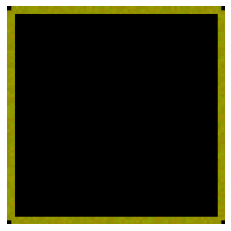

In [1]:
from simple_playgrounds.playgrounds.layouts import SingleRoom
from simple_playgrounds.engine import Engine

%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()

my_playground = SingleRoom(size=(300, 300))

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

## Placing an element at a random position in the Environment.

The initial position of a scene element have to be specified.
Instead of a position, you can define an area where the position will be sampled uniformly.

In the following, we create a circular area sampler centered at (50, 50) and of radius.
We generate 10 objects. Note that we add them without overlapping, meaning that if the playground
can't find a suitable position, it will raise an error.

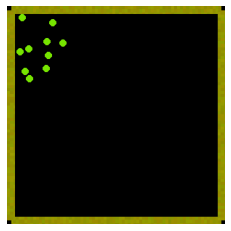

In [2]:
from simple_playgrounds.elements.collection.basic import Physical
from simple_playgrounds.common.position_utils import CoordinateSampler

area = CoordinateSampler((50, 50), area_shape='circle', radius=60)
for i in range(10):
    circular_object = Physical(physical_shape='circle', radius=5, texture = [120, 230, 0])
    try:
        my_playground.add_element(circular_object, area, allow_overlapping = False )
    except:
        print('Failed to place object')

plt_image(engine.generate_playground_image(plt_mode=True))

## Area sampler of different shapes and sizes.

Other possibe shapes are rectangle, or gaussian.
We will allow overlapping for the following added element.

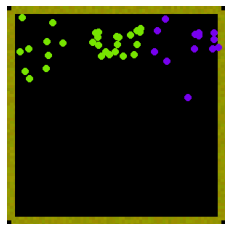

In [3]:
# gaussian area
area = CoordinateSampler((250, 50), area_shape='gaussian', radius = 80, std=100)
for i in range(20):
    circular_object = Physical(physical_shape='circle', radius=5, texture = [120, 0, 240])
    my_playground.add_element(circular_object, area)

area = CoordinateSampler((150, 50), area_shape='rectangle', size=(70, 40))
for i in range(20):
    circular_object = Physical(physical_shape='circle', radius=5, texture = [120, 230, 0])
    my_playground.add_element(circular_object, area)


plt_image(engine.generate_playground_image(plt_mode=True))

## Playground provide their own areas

We will see in a following tutorial that playgrounds are formed of different rooms, and that each room has coordinates as a tuple.

In the case of a single room, its coordinates are (0,0).

Different methods are provided for easily building areas.

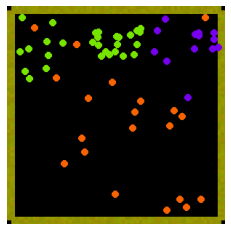

In [4]:
room = my_playground.grid_rooms[0][0]

center_area, size_area = room.center, (room.width, room.length)
area_all = CoordinateSampler(center=center_area, area_shape='rectangle', size=size_area)
for i in range(20):
    circular_object = Physical(physical_shape='circle', radius=5, texture = [250, 100, 0])
    try:
        my_playground.add_element(circular_object, area_all, allow_overlapping=False)
    except:
        print('Failed to place object')

plt_image(engine.generate_playground_image(plt_mode=True))

## Quarter areas

For even more convenience, playgrounds provide quarter areas of rooms.

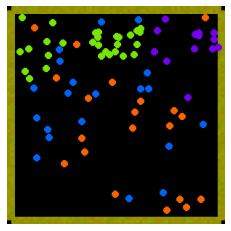

In [5]:
center_area, size_area = room.get_partial_area('right-down')
area_top = CoordinateSampler(center=center_area, area_shape='rectangle', size=size_area)
for i in range(20):
    circular_object = Physical(physical_shape='circle', radius=5, texture = [0, 100, 250])
    
    try:
        my_playground.add_element(circular_object, area_all, allow_overlapping=False)
    except:
        print('Failed to place object')

plt_image(engine.generate_playground_image(plt_mode=True))

## Reset Playground

Finally, Reseting the playground place the added elements in new random positions, sampled in their area.

Note that if you placed too many objects which don't allow overlapping, reset might fail.
You can always try to reset multiple times until it works.

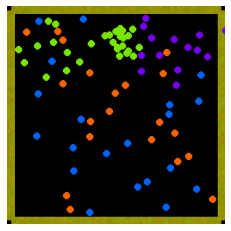

In [6]:
engine.reset()

plt_image(engine.generate_playground_image(plt_mode=True))

In [7]:
engine.terminate()

## Playground with rooms

Other more advanced playgrounds are available: Linear Rooms and Connected Rooms 2D

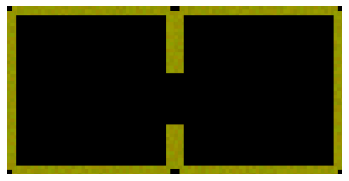

In [8]:
from simple_playgrounds.playgrounds.layouts import LineRooms, GridRooms
from simple_playgrounds.engine import Engine

my_playground = LineRooms(size=(400, 200), number_rooms=2, random_doorstep_position=True, doorstep_size=60)
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

Once a playground is created, you can access the different doorsteps, and easily add a door and a switch.


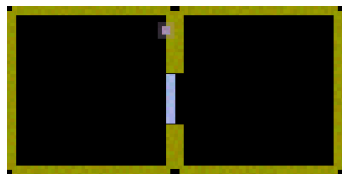

In [9]:
from simple_playgrounds.elements.collection.activable import OpenCloseSwitch

# Generate a door for a doorstep

room_left = my_playground.grid_rooms[0][0]

doorstep = room_left.doorstep_right

door = doorstep.generate_door()
my_playground.add_element(door)

switch = OpenCloseSwitch(door=door)
position_switch = room_left.get_random_position_on_wall(wall_location='right', element=switch)
my_playground.add_element(switch, position_switch)

plt_image(engine.generate_playground_image(plt_mode=True))

## Opening a door with an agent

We add an agent, that you can control with a keyboard.
Go to the switch and activate it with A.

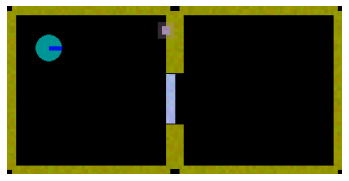

In [10]:
from simple_playgrounds.agents.parts.controllers import Keyboard
from simple_playgrounds.agents.agents import BaseAgent

my_agent = BaseAgent(controller=Keyboard(), interactive=True)
my_playground.add_agent(my_agent, ((50, 50), 0))

engine = Engine(time_limit=10000, playground=my_playground, screen=True)

plt_image(engine.generate_playground_image(plt_mode=True))

engine.run(update_screen=True)
engine.terminate()

## Complex Mazes

We can build playgrounds with any number of rooms.
We can also set the type of doorsteps, their size, and select from a list of wall themes.

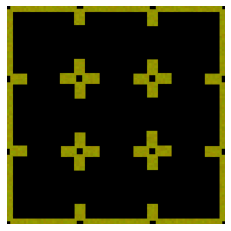

In [13]:
engine.terminate()
my_playground = GridRooms(size=(400, 400), room_layout=(3,3), random_doorstep_position=True, doorstep_size = 60)
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

Let say that we want an object to always appear in the middle-left room.

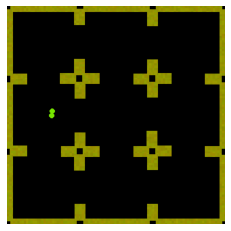

In [18]:
room = my_playground.grid_rooms[0][1]
position_center, shape = room.center, room.size

area = CoordinateSampler(center=position_center, area_shape='rectangle', size=shape )
circular_object = Physical(physical_shape='circle', radius=5, texture = [120, 230, 0])
my_playground.add_element(circular_object, area)

plt_image(engine.generate_playground_image(plt_mode=True))

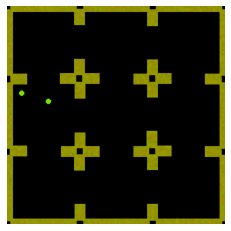

In [23]:
engine.reset()

plt_image(engine.generate_playground_image(plt_mode=True))

In [24]:
engine.terminate()

Different wall types are available: classic, light, dark, colorful.
Nothing prevents you from creating your own using wall_texture.

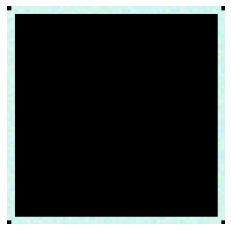

In [25]:
my_playground = SingleRoom(size=(300, 300), wall_type='light')
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

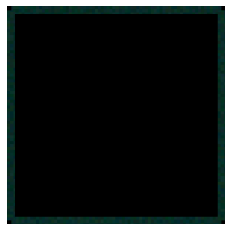

In [26]:
engine.terminate()
my_playground = SingleRoom(size=(300, 300), wall_type='dark')
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

In [27]:
engine.terminate()
my_playground = SingleRoom(size=(300, 300), wall_type='colorful')
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

ValueError: Texture not implemented: unique_random_tiles

In [ ]:
engine.terminate()
my_playground = ConnectedRooms2D(size=(600, 600), n_rooms=(4,4), wall_type='colorful')
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

In [ ]:
engine.terminate()

## Modifying texture of the walls

Finally, we can change texture parameters on the go, by providing additional arguments.

In [ ]:
from simple_playgrounds.utils.texture import UniqueRandomTilesTexture


custom_tecture=UniqueRandomTilesTexture(color_min=(0, 100, 0), color_max=(250, 100, 0), n_colors=4, radius = 200)

my_playground = ConnectedRooms2D(size=(600, 600), n_rooms=(3,3),  wall_texture=custom_tecture)
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))